**`KARAR AĞAÇLARI Random Forest  `**

In [ ]:
#Rastgele orman algoritması birden fazla karar ağacının bir araya getirilmesiyle oluşan bir makine öğrenmesi modelidir

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#veri seti amerikada yaşayan insanların maaş sıkalasını göstermektedir
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['yas', 'is_turu', 'gozlem_sayisi', 'egitim', 'egitim_seviyesi',
           'evlilik_durum', 'meslek','iliski_durum', 'irk', 'cinsiyet',
           'sermaye_kazani', 'sermaye_kaybi', 'haftalik_calisma_saati',
           'anavatani', 'gelir']
df = pd.read_csv(url, header=None, names=columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   yas                     32561 non-null  int64 
 1   is_turu                 32561 non-null  object
 2   gozlem_sayisi           32561 non-null  int64 
 3   egitim                  32561 non-null  object
 4   egitim_seviyesi         32561 non-null  int64 
 5   evlilik_durum           32561 non-null  object
 6   meslek                  32561 non-null  object
 7   iliski_durum            32561 non-null  object
 8   irk                     32561 non-null  object
 9   cinsiyet                32561 non-null  object
 10  sermaye_kazani          32561 non-null  int64 
 11  sermaye_kaybi           32561 non-null  int64 
 12  haftalik_calisma_saati  32561 non-null  int64 
 13  anavatani               32561 non-null  object
 14  gelir                   32561 non-null  object
dtypes:

In [ ]:
print(df.describe())

                yas  gozlem_sayisi  egitim_seviyesi  sermaye_kazani  \
count  32561.000000   3.256100e+04     32561.000000    32561.000000   
mean      38.581647   1.897784e+05        10.080679     1077.648844   
std       13.640433   1.055500e+05         2.572720     7385.292085   
min       17.000000   1.228500e+04         1.000000        0.000000   
25%       28.000000   1.178270e+05         9.000000        0.000000   
50%       37.000000   1.783560e+05        10.000000        0.000000   
75%       48.000000   2.370510e+05        12.000000        0.000000   
max       90.000000   1.484705e+06        16.000000    99999.000000   

       sermaye_kaybi  haftalik_calisma_saati  
count   32561.000000            32561.000000  
mean       87.303830               40.437456  
std       402.960219               12.347429  
min         0.000000                1.000000  
25%         0.000000               40.000000  
50%         0.000000               40.000000  
75%         0.000000           

<Axes: xlabel='gelir', ylabel='count'>

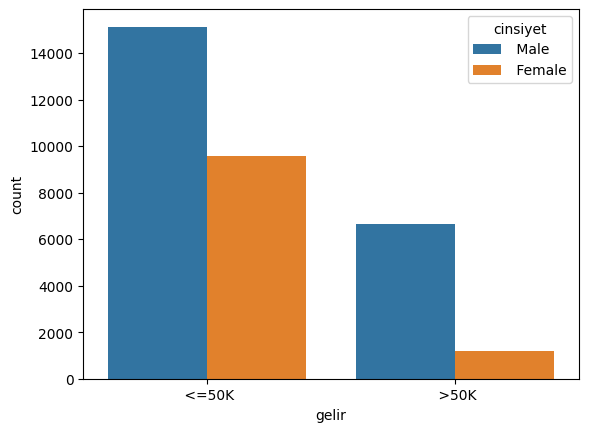

In [ ]:
import seaborn as sns
sns.countplot(x='gelir', hue='cinsiyet',data=df)
#kadınlarda 1/10 daha az maaş alyor erkekler 1/7 si daha fazla mmaaş alyor

In [ ]:
df['gelir']=df['gelir'].apply(lambda x: 1 if x == ' >50K' else 0)
dummies= pd.get_dummies(df, columns=['is_turu', 'egitim', 'evlilik_durum', 'meslek',
                                 'iliski_durum', 'irk', 'cinsiyet', 'anavatani'])


print(dummies)
print(df.head())

#dumy değişkenler olulturulur ve yazılır 50k üstü sayılar için 0 ve 1 değişkenlerini alır

       yas  gozlem_sayisi  egitim_seviyesi  sermaye_kazani  sermaye_kaybi  \
0       39          77516               13            2174              0   
1       50          83311               13               0              0   
2       38         215646                9               0              0   
3       53         234721                7               0              0   
4       28         338409               13               0              0   
...    ...            ...              ...             ...            ...   
32556   27         257302               12               0              0   
32557   40         154374                9               0              0   
32558   58         151910                9               0              0   
32559   22         201490                9               0              0   
32560   52         287927                9           15024              0   

       haftalik_calisma_saati  gelir  is_turu_ ?  is_turu_ Federal-gov  \
0

In [ ]:
#Verileri dumy değilşkenlerle doldurduktan sonra eski verileri dropluyoruz
y = df['gelir']
df = pd.concat([df, dummies], axis=1)
df = df.drop(['is_turu', 'egitim', 'evlilik_durum', 'meslek',
              'iliski_durum', 'irk', 'cinsiyet', 'anavatani'], axis=1)
X = df.drop('gelir', axis=1)
print("Özellikler:\n ", X.head())
print("*********")
print("Hedef     :\n", y.head())

Özellikler:
     yas  gozlem_sayisi  egitim_seviyesi  sermaye_kazani  sermaye_kaybi  \
0   39          77516               13            2174              0   
1   50          83311               13               0              0   
2   38         215646                9               0              0   
3   53         234721                7               0              0   
4   28         338409               13               0              0   

   haftalik_calisma_saati  yas  gozlem_sayisi  egitim_seviyesi  \
0                      40   39          77516               13   
1                      13   50          83311               13   
2                      40   38         215646                9   
3                      40   53         234721                7   
4                      40   28         338409               13   

   sermaye_kazani  ...  anavatani_ Portugal  anavatani_ Puerto-Rico  \
0            2174  ...                    0                       0   
1       

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
#Model seçme
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, 30]}
grid = GridSearchCV(rf, params, cv=5, scoring='accuracy')
#Modeli Eğitme
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
print("En iyi parametreler: ", grid.best_params_)
best_rf = grid.best_estimator_


En iyi parametreler:  {'max_depth': 20, 'n_estimators': 200}


In [ ]:
print("----------------------------------------------------------------")
print("Eğitim verisi için doğruluk :", best_rf.score(X_train, y_train))
print("----------------------------------------------------------------")
print("Test verisi için doğruluk   :", best_rf.score(X_test, y_test))

----------------------------------------------------------------
Eğitim verisi için doğruluk : 0.925406941031941
----------------------------------------------------------------
Test verisi için doğruluk   : 0.9335175802241671


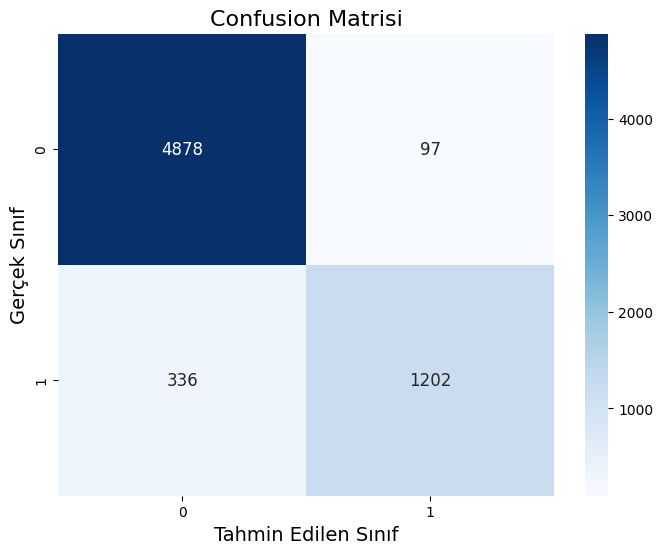

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion matrisini hesaplama
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Confusion matrisini görselleştirme
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, fmt='d', annot_kws={"size": 12})
ax.set_xlabel('Tahmin Edilen Sınıf', fontsize=14)
ax.set_ylabel('Gerçek Sınıf', fontsize=14)
ax.set_title('Confusion Matrisi', fontsize=16)
plt.show()
